In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
pwd

'/Users/rtv-lpt-127/morris/interviews_2025/Engie-datascience-Assessment/notebooks'

In [3]:
# Load the data
df = pd.read_csv('../data/repayment_data.csv')
df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,Type of Transaction,Date of Transaction,Value of Transaction,Number of Days Purchased,Total Amount of Loan Received,Outstanding Loan Balance
0,1ebfe5fcc9,Home Plus Kit [MTN],60000,1100,540,654000,Initialization,2013-12-14 12:59:29,0,0,0,654000
1,1ebfe5fcc9,Home Plus Kit [MTN],60000,1100,540,654000,Deposit,2013-12-14 13:44:19,60000,0,60000,594000
2,1ebfe5fcc9,Home Plus Kit [MTN],60000,1100,540,654000,Commission,2013-12-19 19:16:18,6600,6,60000,587400
3,1ebfe5fcc9,Home Plus Kit [MTN],60000,1100,540,654000,General Discount,2013-12-24 13:56:42,0,2,60000,587400
4,1ebfe5fcc9,Home Plus Kit [MTN],60000,1100,540,654000,Payment,2013-12-26 10:16:17,7000,6,67000,580400


In [4]:
# Get basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (187990, 12)

Column names:
['Account ID', 'Account Kit Type', 'Payment Plan Deposit', 'Payment Plan Daily Rate', 'Payment Plan Loan Duration', 'Payment Plan Total Loan Value', 'Type of Transaction', 'Date of Transaction', 'Value of Transaction', 'Number of Days Purchased', 'Total Amount of Loan Received', 'Outstanding Loan Balance']

Data types:
Account ID                       object
Account Kit Type                 object
Payment Plan Deposit              int64
Payment Plan Daily Rate           int64
Payment Plan Loan Duration        int64
Payment Plan Total Loan Value     int64
Type of Transaction              object
Date of Transaction              object
Value of Transaction              int64
Number of Days Purchased          int64
Total Amount of Loan Received     int64
Outstanding Loan Balance          int64
dtype: object

Missing values:
Account ID                       0
Account Kit Type                 0
Payment Plan Deposit             0
Payment Plan Daily R

In [5]:
# Get summary statistics
df.describe()

,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,Value of Transaction,Number of Days Purchased,Total Amount of Loan Received,Outstanding Loan Balance
count,187990.000000,187990.000000,187990.0,1.879900e+05,187990.000000,187990.000000,1.879900e+05,1.879900e+05
mean,57372.253843,1220.246290,540.0,7.163053e+05,10528.668089,7.094627,3.266268e+05,3.862830e+05
std,16373.721935,213.781347,0.0,1.277769e+05,18484.652161,9.484687,1.961890e+05,1.972921e+05
min,40000.000000,1000.000000,540.0,5.800000e+05,-161500.000000,-99.000000,0.000000e+00,-1.657000e+05
25%,40000.000000,1000.000000,540.0,5.800000e+05,2200.000000,2.000000,1.660000e+05,2.389500e+05
50%,60000.000000,1350.000000,540.0,8.140000e+05,5500.000000,5.000000,3.020000e+05,3.890000e+05
75%,60000.000000,1400.000000,540.0,8.160000e+05,10000.000000,7.000000,4.630000e+05,5.210000e+05
max,160000.000000,3900.000000,540.0,2.266000e+06,945000.000000,99.000000,1.159500e+06,2.266000e+06


In [5]:
# Check unique values in categorical columns
print("Unique Account Kit Types:")
print(df['Account Kit Type'].unique())
print("\nCount of Account Kit Types:")
print(df['Account Kit Type'].value_counts())

print("\nUnique Transaction Types:")
print(df['Type of Transaction'].unique())
print("\nCount of Transaction Types:")
print(df['Type of Transaction'].value_counts())

Unique Account Kit Types:
['Home Plus Kit [MTN]' 'Home Starter Kit Intro [MTN]'
 'Home Comfort Kit [MTN]' 'Home Starter Kit [MTN]'
 'Business Pro Kit [MTN]' 'Home Comfort Kit Intro [MTN]'
 'Business Pro Kit Intro [MTN]' 'Business Starter Kit Intro [MTN]'
 'TV Kit Intro [MTN]' 'Business Starter Kit [MTN]']

Count of Account Kit Types:
Account Kit Type
Home Comfort Kit [MTN]              60623
Home Starter Kit [MTN]              45113
Home Comfort Kit Intro [MTN]        28699
Home Starter Kit Intro [MTN]        23941
Home Plus Kit [MTN]                 23100
Business Pro Kit [MTN]               3380
Business Pro Kit Intro [MTN]         2352
Business Starter Kit Intro [MTN]      718
Business Starter Kit [MTN]             41
TV Kit Intro [MTN]                     23
Name: count, dtype: int64

Unique Transaction Types:
['Initialization' 'Deposit' 'Commission' 'General Discount' 'Payment'
 'Cancellation' 'Redemption' 'Incentive' 'Payoff' 'Upgrade']

Count of Transaction Types:
Type of Transa

In [7]:
# Convert date column to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Add some useful date-related columns
df['Year'] = df['Date of Transaction'].dt.year
df['Month'] = df['Date of Transaction'].dt.month
df['Day'] = df['Date of Transaction'].dt.day
df['Weekday'] = df['Date of Transaction'].dt.day_name()

# Check the date range in the dataset
print("Date range in the dataset:")
print("Earliest date:", df['Date of Transaction'].min())
print("Latest date:", df['Date of Transaction'].max())
print("Total time span:", df['Date of Transaction'].max() - df['Date of Transaction'].min())

Date range in the dataset:
Earliest date: 2012-12-18 11:03:42
Latest date: 2015-06-03 12:25:50
Total time span: 897 days 01:22:08


In [8]:
# Count unique accounts
num_accounts = df['Account ID'].nunique()
print(f"Number of unique accounts: {num_accounts}")

# Distribution of accounts by kit type
account_kit_distribution = df.groupby('Account ID')['Account Kit Type'].first().value_counts()
print("\nDistribution of accounts by kit type:")
print(account_kit_distribution)

Number of unique accounts: 3999

Distribution of accounts by kit type:
Account Kit Type
Home Comfort Kit [MTN]              1255
Home Starter Kit [MTN]              1028
Home Comfort Kit Intro [MTN]         536
Home Plus Kit [MTN]                  534
Home Starter Kit Intro [MTN]         496
Business Pro Kit [MTN]                77
Business Pro Kit Intro [MTN]          55
Business Starter Kit Intro [MTN]      14
TV Kit Intro [MTN]                     3
Business Starter Kit [MTN]             1
Name: count, dtype: int64


In [9]:
#identify the first and last transaction dates for each account
account_date_ranges = df.groupby('Account ID').agg({
    'Date of Transaction': ['min', 'max']
})
account_date_ranges.columns = ['first_transaction_date', 'last_transaction_date']
account_date_ranges['account_lifetime_days'] = (account_date_ranges['last_transaction_date'] - 
                                               account_date_ranges['first_transaction_date']).dt.days

In [10]:
account_date_ranges.head()

,first_transaction_date,last_transaction_date,account_lifetime_days
Account ID,,,
0.00E+00,2013-08-25 15:23:38,2015-06-02 15:15:10,645
000560663f,2013-08-18 15:07:57,2014-12-09 12:04:59,477
0018cf836a,2013-08-03 09:17:11,2015-05-04 09:41:04,639
001b6d4d31,2013-11-29 11:47:29,2015-05-28 12:05:41,545
00202f4fe5,2013-11-19 15:01:15,2014-11-09 23:05:06,355


In [11]:
#final status of each account (last transaction type)
account_final_status = df.sort_values('Date of Transaction').groupby('Account ID').last()['Type of Transaction']
account_final_status = account_final_status.reset_index()
account_final_status.columns = ['Account ID', 'final_status']
account_final_status.head()

,Account ID,final_status
0,0.00E+00,Payment
1,000560663f,Payoff
2,0018cf836a,Payment
3,001b6d4d31,Payoff
4,00202f4fe5,Cancellation


In [12]:
account_df = df.sort_values('Date of Transaction').groupby('Account ID').first()[
    ['Account Kit Type', 'Payment Plan Deposit', 'Payment Plan Daily Rate', 
     'Payment Plan Loan Duration', 'Payment Plan Total Loan Value']
].reset_index()

account_df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000


In [13]:
# Add date range information (reset index first)
account_date_ranges = account_date_ranges.reset_index()
account_df = account_df.merge(account_date_ranges, on='Account ID')

# Add final status
account_df = account_df.merge(account_final_status, on='Account ID')

account_df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,first_transaction_date,last_transaction_date,account_lifetime_days,final_status
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000,2013-08-25 15:23:38,2015-06-02 15:15:10,645,Payment
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-18 15:07:57,2014-12-09 12:04:59,477,Payoff
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-03 09:17:11,2015-05-04 09:41:04,639,Payment
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000,2013-11-29 11:47:29,2015-05-28 12:05:41,545,Payoff
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000,2013-11-19 15:01:15,2014-11-09 23:05:06,355,Cancellation


let's add more features related to payment behavior:

In [14]:
# Filter only payment transactions
payment_df = df[df['Type of Transaction'] == 'Payment']

# Calculate payment-related features
payment_features = payment_df.groupby('Account ID').agg({
    'Value of Transaction': ['count', 'mean', 'std', 'sum', 'min', 'max'],
    'Number of Days Purchased': ['mean', 'sum'],
    'Date of Transaction': lambda x: x.diff().dt.days.mean()  
})

payment_features.head()

Value of Transaction                                                    Number of Days Purchased      Date of Transaction
                          count          mean           std     sum    min     max                     mean  sum            <lambda>
Account ID                                                                                                                          
0.00E+00                     87   3548.850575   3228.263420  308750   1000   10000                 3.045977  265            1.000000
000560663f                  106   4915.094340   5650.314655  521000   1000   57000                 4.226415  448            3.895238
0018cf836a                   31  16935.483871   9161.278964  525000   3000   30000                15.870968  492           20.433333
001b6d4d31                   68   8779.411765  30977.192182  597000   1100  255000                 3.926471  267            7.492537
00202f4fe5                    3  41000.000000    866.025404  123000  40500   42000                30.333333   91           66.500000

In [15]:
# Flatten the column names
payment_features.columns = ['_'.join(col).strip() for col in payment_features.columns.values]
payment_features.rename(columns={'Date of Transaction_<lambda>': 'avg_days_between_payments'}, inplace=True)
payment_features.head()

,Value of Transaction_count,Value of Transaction_mean,Value of Transaction_std,Value of Transaction_sum,Value of Transaction_min,Value of Transaction_max,Number of Days Purchased_mean,Number of Days Purchased_sum,avg_days_between_payments
Account ID,,,,,,,,,
0.00E+00,87,3548.850575,3228.263420,308750,1000,10000,3.045977,265,1.000000
000560663f,106,4915.094340,5650.314655,521000,1000,57000,4.226415,448,3.895238
0018cf836a,31,16935.483871,9161.278964,525000,3000,30000,15.870968,492,20.433333
001b6d4d31,68,8779.411765,30977.192182,597000,1100,255000,3.926471,267,7.492537
00202f4fe5,3,41000.000000,866.025404,123000,40500,42000,30.333333,91,66.500000


In [16]:
# Reset index on payment features and merge
payment_features = payment_features.reset_index()
account_df = account_df.merge(payment_features, on='Account ID', how='left')
account_df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,first_transaction_date,last_transaction_date,account_lifetime_days,final_status,Value of Transaction_count,Value of Transaction_mean,Value of Transaction_std,Value of Transaction_sum,Value of Transaction_min,Value of Transaction_max,Number of Days Purchased_mean,Number of Days Purchased_sum,avg_days_between_payments
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000,2013-08-25 15:23:38,2015-06-02 15:15:10,645,Payment,87.0,3548.850575,3228.263420,308750.0,1000.0,10000.0,3.045977,265.0,1.000000
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-18 15:07:57,2014-12-09 12:04:59,477,Payoff,106.0,4915.094340,5650.314655,521000.0,1000.0,57000.0,4.226415,448.0,3.895238
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-03 09:17:11,2015-05-04 09:41:04,639,Payment,31.0,16935.483871,9161.278964,525000.0,3000.0,30000.0,15.870968,492.0,20.433333
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000,2013-11-29 11:47:29,2015-05-28 12:05:41,545,Payoff,68.0,8779.411765,30977.192182,597000.0,1100.0,255000.0,3.926471,267.0,7.492537
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000,2013-11-19 15:01:15,2014-11-09 23:05:06,355,Cancellation,3.0,41000.000000,866.025404,123000.0,40500.0,42000.0,30.333333,91.0,66.500000


In [17]:
# Calculate percentage of loan paid
last_transactions = df.sort_values('Date of Transaction').groupby('Account ID').last()[['Total Amount of Loan Received', 'Payment Plan Total Loan Value']]
last_transactions['loan_paid_percentage'] = (last_transactions['Total Amount of Loan Received'] / 
                                            last_transactions['Payment Plan Total Loan Value'] * 100)
last_transactions = last_transactions.reset_index()[['Account ID', 'loan_paid_percentage']]

last_transactions.head()

,Account ID,loan_paid_percentage
0,0.00E+00,37.189655
1,000560663f,96.724138
2,0018cf836a,97.413793
3,001b6d4d31,100.458716
4,00202f4fe5,25.552826


In [18]:
# Merge loan paid percentage
account_df = account_df.merge(last_transactions, on='Account ID', how='left')

# Let's check the results
account_df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,first_transaction_date,last_transaction_date,account_lifetime_days,final_status,Value of Transaction_count,Value of Transaction_mean,Value of Transaction_std,Value of Transaction_sum,Value of Transaction_min,Value of Transaction_max,Number of Days Purchased_mean,Number of Days Purchased_sum,avg_days_between_payments,loan_paid_percentage
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000,2013-08-25 15:23:38,2015-06-02 15:15:10,645,Payment,87.0,3548.850575,3228.263420,308750.0,1000.0,10000.0,3.045977,265.0,1.000000,37.189655
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-18 15:07:57,2014-12-09 12:04:59,477,Payoff,106.0,4915.094340,5650.314655,521000.0,1000.0,57000.0,4.226415,448.0,3.895238,96.724138
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-03 09:17:11,2015-05-04 09:41:04,639,Payment,31.0,16935.483871,9161.278964,525000.0,3000.0,30000.0,15.870968,492.0,20.433333,97.413793
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000,2013-11-29 11:47:29,2015-05-28 12:05:41,545,Payoff,68.0,8779.411765,30977.192182,597000.0,1100.0,255000.0,3.926471,267.0,7.492537,100.458716
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000,2013-11-19 15:01:15,2014-11-09 23:05:06,355,Cancellation,3.0,41000.000000,866.025404,123000.0,40500.0,42000.0,30.333333,91.0,66.500000,25.552826


In [19]:
# Add count of different transaction types
pd.crosstab(df['Account ID'], df['Type of Transaction']).reset_index()

Type of Transaction,Account ID,Cancellation,Commission,Deposit,General Discount,Incentive,Initialization,Payment,Payoff,Redemption,Upgrade
0,0.00E+00,2,1,2,5,0,2,87,0,2,0
1,000560663f,0,1,1,1,2,1,106,1,14,0
2,0018cf836a,0,1,1,2,0,1,31,0,0,0
3,001b6d4d31,0,0,1,3,0,1,68,1,1,0
4,00202f4fe5,1,0,1,2,0,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,ffd200aeef,1,1,1,0,0,1,14,0,0,0
3995,ffe74a5125,0,0,1,3,1,1,2,1,3,0
3996,ffe939cf5c,0,1,1,2,2,1,24,0,0,0
3997,ffede732cc,0,0,1,2,2,1,69,1,3,0


In [20]:
# Add count of different transaction types
transaction_type_counts = pd.crosstab(df['Account ID'], df['Type of Transaction']).reset_index()
account_df = account_df.merge(transaction_type_counts, on='Account ID', how='left')

# Check for missing values
print("Missing values in account dataframe:")
print(account_df.isnull().sum())

Missing values in account dataframe:
Account ID                         0
Account Kit Type                   0
Payment Plan Deposit               0
Payment Plan Daily Rate            0
Payment Plan Loan Duration         0
Payment Plan Total Loan Value      0
first_transaction_date             0
last_transaction_date              0
account_lifetime_days              0
final_status                       0
Value of Transaction_count       111
Value of Transaction_mean        111
Value of Transaction_std         208
Value of Transaction_sum         111
Value of Transaction_min         111
Value of Transaction_max         111
Number of Days Purchased_mean    111
Number of Days Purchased_sum     111
avg_days_between_payments        208
loan_paid_percentage               0
Cancellation                       0
Commission                         0
Deposit                            0
General Discount                   0
Incentive                          0
Initialization                     0
P

In [21]:
# Look at our final dataframe
account_df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,first_transaction_date,last_transaction_date,account_lifetime_days,final_status,Value of Transaction_count,Value of Transaction_mean,Value of Transaction_std,Value of Transaction_sum,Value of Transaction_min,Value of Transaction_max,Number of Days Purchased_mean,Number of Days Purchased_sum,avg_days_between_payments,loan_paid_percentage,Cancellation,Commission,Deposit,General Discount,Incentive,Initialization,Payment,Payoff,Redemption,Upgrade
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000,2013-08-25 15:23:38,2015-06-02 15:15:10,645,Payment,87.0,3548.850575,3228.263420,308750.0,1000.0,10000.0,3.045977,265.0,1.000000,37.189655,2,1,2,5,0,2,87,0,2,0
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-18 15:07:57,2014-12-09 12:04:59,477,Payoff,106.0,4915.094340,5650.314655,521000.0,1000.0,57000.0,4.226415,448.0,3.895238,96.724138,0,1,1,1,2,1,106,1,14,0
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-03 09:17:11,2015-05-04 09:41:04,639,Payment,31.0,16935.483871,9161.278964,525000.0,3000.0,30000.0,15.870968,492.0,20.433333,97.413793,0,1,1,2,0,1,31,0,0,0
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000,2013-11-29 11:47:29,2015-05-28 12:05:41,545,Payoff,68.0,8779.411765,30977.192182,597000.0,1100.0,255000.0,3.926471,267.0,7.492537,100.458716,0,0,1,3,0,1,68,1,1,0
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000,2013-11-19 15:01:15,2014-11-09 23:05:06,355,Cancellation,3.0,41000.000000,866.025404,123000.0,40500.0,42000.0,30.333333,91.0,66.500000,25.552826,1,0,1,2,0,1,3,0,0,0


In [22]:
# Calculate early payment behavior (first 30 days)
early_df = df[(df['Date of Transaction'] - df.groupby('Account ID')['Date of Transaction'].transform('min')).dt.days <= 30]
early_payment_features = early_df[early_df['Type of Transaction'] == 'Payment'].groupby('Account ID').agg({
    'Value of Transaction': ['count', 'sum'],
    'Number of Days Purchased': ['sum']
})

# Flatten the column names
early_payment_features.columns = ['early_payment_count', 'early_payment_amount', 'early_days_purchased']

early_payment_features.head()

,early_payment_count,early_payment_amount,early_days_purchased
Account ID,,,
0.00E+00,3,25700,17
000560663f,3,35000,35
0018cf836a,1,30000,30
001b6d4d31,2,25400,23
00202f4fe5,1,40500,30


In [23]:
# Reset index and merge
early_payment_features = early_payment_features.reset_index()
account_df = account_df.merge(early_payment_features, on='Account ID', how='left')

# Fill NaN values for accounts with no early payments
account_df['early_payment_count'] = account_df['early_payment_count'].fillna(0)
account_df['early_payment_amount'] = account_df['early_payment_amount'].fillna(0)
account_df['early_days_purchased'] = account_df['early_days_purchased'].fillna(0)

In [24]:
# Add payment frequency features
account_df['payment_frequency'] = account_df['Value of Transaction_count'] / account_df['account_lifetime_days']
account_df['avg_payment_size'] = account_df['Value of Transaction_sum'] / account_df['Value of Transaction_count']
account_df['payment_to_loan_ratio'] = account_df['Value of Transaction_sum'] / account_df['Payment Plan Total Loan Value']

# Add features about days purchased vs. days paid for
account_df['days_purchased_ratio'] = account_df['Number of Days Purchased_sum'] / account_df['account_lifetime_days']

# Add features about payment regularity
# Calculate coefficient of variation (normalized measure of dispersion)
account_df['payment_amount_cv'] = account_df['Value of Transaction_std'] / account_df['Value of Transaction_mean']

# Add feature for time to first payment
first_payments = df[df['Type of Transaction'] == 'Payment'].sort_values('Date of Transaction').groupby('Account ID').first()
first_payments['days_to_first_payment'] = (first_payments['Date of Transaction'] - 
                                          df.groupby('Account ID')['Date of Transaction'].min()).dt.days
first_payments = first_payments.reset_index()[['Account ID', 'days_to_first_payment']]

# Merge with account dataframe
account_df = account_df.merge(first_payments, on='Account ID', how='left')

In [25]:
account_df.head()

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,first_transaction_date,last_transaction_date,account_lifetime_days,final_status,Value of Transaction_count,Value of Transaction_mean,Value of Transaction_std,Value of Transaction_sum,Value of Transaction_min,Value of Transaction_max,Number of Days Purchased_mean,Number of Days Purchased_sum,avg_days_between_payments,loan_paid_percentage,Cancellation,Commission,Deposit,General Discount,Incentive,Initialization,Payment,Payoff,Redemption,Upgrade,early_payment_count,early_payment_amount,early_days_purchased,payment_frequency,avg_payment_size,payment_to_loan_ratio,days_purchased_ratio,payment_amount_cv,days_to_first_payment
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000,2013-08-25 15:23:38,2015-06-02 15:15:10,645,Payment,87.0,3548.850575,3228.263420,308750.0,1000.0,10000.0,3.045977,265.0,1.000000,37.189655,2,1,2,5,0,2,87,0,2,0,3.0,25700.0,17.0,0.134884,3548.850575,0.378370,0.410853,0.909665,6.0
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-18 15:07:57,2014-12-09 12:04:59,477,Payoff,106.0,4915.094340,5650.314655,521000.0,1000.0,57000.0,4.226415,448.0,3.895238,96.724138,0,1,1,1,2,1,106,1,14,0,3.0,35000.0,35.0,0.222222,4915.094340,0.898276,0.939203,1.149584,6.0
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-03 09:17:11,2015-05-04 09:41:04,639,Payment,31.0,16935.483871,9161.278964,525000.0,3000.0,30000.0,15.870968,492.0,20.433333,97.413793,0,1,1,2,0,1,31,0,0,0,1.0,30000.0,30.0,0.048513,16935.483871,0.905172,0.769953,0.540952,9.0
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000,2013-11-29 11:47:29,2015-05-28 12:05:41,545,Payoff,68.0,8779.411765,30977.192182,597000.0,1100.0,255000.0,3.926471,267.0,7.492537,100.458716,0,0,1,3,0,1,68,1,1,0,2.0,25400.0,23.0,0.124771,8779.411765,0.912844,0.489908,3.528390,8.0
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000,2013-11-19 15:01:15,2014-11-09 23:05:06,355,Cancellation,3.0,41000.000000,866.025404,123000.0,40500.0,42000.0,30.333333,91.0,66.500000,25.552826,1,0,1,2,0,1,3,0,0,0,1.0,40500.0,30.0,0.008451,41000.000000,0.151106,0.256338,0.021123,10.0


In [26]:
# Calculate repayment pace
# How much of the loan was paid off per active day
account_df['repayment_pace'] = account_df['loan_paid_percentage'] / account_df['account_lifetime_days']

# Create binary target variable for loan completion
account_df['loan_completed'] = account_df['final_status'].apply(lambda x: 1 if x == 'Payoff' else 0)
account_df['loan_cancelled'] = account_df['final_status'].apply(lambda x: 1 if x == 'Cancellation' else 0)

# Check if account has any redemptions (might indicate financial flexibility)
account_df['has_redemptions'] = (account_df['Redemption'] > 0).astype(int)

# Check if account has any incentives (might indicate engagement)
account_df['has_incentives'] = (account_df['Incentive'] > 0).astype(int)

In [27]:
# One-hot encode the kit type
kit_type_dummies = pd.get_dummies(account_df['Account Kit Type'], prefix='kit')
account_df = pd.concat([account_df, kit_type_dummies], axis=1)

In [28]:
# Display the final dataframe shape and columns
print(f"Final account dataframe shape: {account_df.shape}")
print("\nColumn names:")
print(account_df.columns.tolist())

# Check the first few rows
account_df.head()

Final account dataframe shape: (3999, 54)

Column names:
['Account ID', 'Account Kit Type', 'Payment Plan Deposit', 'Payment Plan Daily Rate', 'Payment Plan Loan Duration', 'Payment Plan Total Loan Value', 'first_transaction_date', 'last_transaction_date', 'account_lifetime_days', 'final_status', 'Value of Transaction_count', 'Value of Transaction_mean', 'Value of Transaction_std', 'Value of Transaction_sum', 'Value of Transaction_min', 'Value of Transaction_max', 'Number of Days Purchased_mean', 'Number of Days Purchased_sum', 'avg_days_between_payments', 'loan_paid_percentage', 'Cancellation', 'Commission', 'Deposit', 'General Discount', 'Incentive', 'Initialization', 'Payment', 'Payoff', 'Redemption', 'Upgrade', 'early_payment_count', 'early_payment_amount', 'early_days_purchased', 'payment_frequency', 'avg_payment_size', 'payment_to_loan_ratio', 'days_purchased_ratio', 'payment_amount_cv', 'days_to_first_payment', 'repayment_pace', 'loan_completed', 'loan_cancelled', 'has_redemptio

,Account ID,Account Kit Type,Payment Plan Deposit,Payment Plan Daily Rate,Payment Plan Loan Duration,Payment Plan Total Loan Value,first_transaction_date,last_transaction_date,account_lifetime_days,final_status,Value of Transaction_count,Value of Transaction_mean,Value of Transaction_std,Value of Transaction_sum,Value of Transaction_min,Value of Transaction_max,Number of Days Purchased_mean,Number of Days Purchased_sum,avg_days_between_payments,loan_paid_percentage,Cancellation,Commission,Deposit,General Discount,Incentive,Initialization,Payment,Payoff,Redemption,Upgrade,early_payment_count,early_payment_amount,early_days_purchased,payment_frequency,avg_payment_size,payment_to_loan_ratio,days_purchased_ratio,payment_amount_cv,days_to_first_payment,repayment_pace,loan_completed,loan_cancelled,has_redemptions,has_incentives,kit_Business Pro Kit Intro [MTN],kit_Business Pro Kit [MTN],kit_Business Starter Kit Intro [MTN],kit_Business Starter Kit [MTN],kit_Home Comfort Kit Intro [MTN],kit_Home Comfort Kit [MTN],kit_Home Plus Kit [MTN],kit_Home Starter Kit Intro [MTN],kit_Home Starter Kit [MTN],kit_TV Kit Intro [MTN]
0,0.00E+00,Home Comfort Kit [MTN],60000,1400,540,816000,2013-08-25 15:23:38,2015-06-02 15:15:10,645,Payment,87.0,3548.850575,3228.263420,308750.0,1000.0,10000.0,3.045977,265.0,1.000000,37.189655,2,1,2,5,0,2,87,0,2,0,3.0,25700.0,17.0,0.134884,3548.850575,0.378370,0.410853,0.909665,6.0,0.057658,0,0,1,0,False,False,False,False,False,True,False,False,False,False
1,000560663f,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-18 15:07:57,2014-12-09 12:04:59,477,Payoff,106.0,4915.094340,5650.314655,521000.0,1000.0,57000.0,4.226415,448.0,3.895238,96.724138,0,1,1,1,2,1,106,1,14,0,3.0,35000.0,35.0,0.222222,4915.094340,0.898276,0.939203,1.149584,6.0,0.202776,1,0,1,1,False,False,False,False,False,False,False,False,True,False
2,0018cf836a,Home Starter Kit [MTN],40000,1000,540,580000,2013-08-03 09:17:11,2015-05-04 09:41:04,639,Payment,31.0,16935.483871,9161.278964,525000.0,3000.0,30000.0,15.870968,492.0,20.433333,97.413793,0,1,1,2,0,1,31,0,0,0,1.0,30000.0,30.0,0.048513,16935.483871,0.905172,0.769953,0.540952,9.0,0.152447,0,0,0,0,False,False,False,False,False,False,False,False,True,False
3,001b6d4d31,Home Plus Kit [MTN],60000,1100,540,654000,2013-11-29 11:47:29,2015-05-28 12:05:41,545,Payoff,68.0,8779.411765,30977.192182,597000.0,1100.0,255000.0,3.926471,267.0,7.492537,100.458716,0,0,1,3,0,1,68,1,1,0,2.0,25400.0,23.0,0.124771,8779.411765,0.912844,0.489908,3.528390,8.0,0.184328,1,0,1,0,False,False,False,False,False,False,True,False,False,False
4,00202f4fe5,Home Comfort Kit [MTN],85000,1350,540,814000,2013-11-19 15:01:15,2014-11-09 23:05:06,355,Cancellation,3.0,41000.000000,866.025404,123000.0,40500.0,42000.0,30.333333,91.0,66.500000,25.552826,1,0,1,2,0,1,3,0,0,0,1.0,40500.0,30.0,0.008451,41000.000000,0.151106,0.256338,0.021123,10.0,0.071980,0,1,0,0,False,False,False,False,False,True,False,False,False,False


In [29]:
# Fill missing values
account_df['Value of Transaction_count'] = account_df['Value of Transaction_count'].fillna(0)
account_df['Value of Transaction_mean'] = account_df['Value of Transaction_mean'].fillna(0)
account_df['Value of Transaction_std'] = account_df['Value of Transaction_std'].fillna(0)
account_df['Value of Transaction_sum'] = account_df['Value of Transaction_sum'].fillna(0)
account_df['Value of Transaction_min'] = account_df['Value of Transaction_min'].fillna(0)
account_df['Value of Transaction_max'] = account_df['Value of Transaction_max'].fillna(0)
account_df['Number of Days Purchased_mean'] = account_df['Number of Days Purchased_mean'].fillna(0)
account_df['Number of Days Purchased_sum'] = account_df['Number of Days Purchased_sum'].fillna(0)
account_df['avg_days_between_payments'] = account_df['avg_days_between_payments'].fillna(0)
account_df['days_to_first_payment'] = account_df['days_to_first_payment'].fillna(-1)  


# Fill derived features that might have NaN due to division by zero
account_df['payment_frequency'] = account_df['payment_frequency'].fillna(0)
account_df['avg_payment_size'] = account_df['avg_payment_size'].fillna(0)
account_df['payment_to_loan_ratio'] = account_df['payment_to_loan_ratio'].fillna(0)
account_df['days_purchased_ratio'] = account_df['days_purchased_ratio'].fillna(0)
account_df['payment_amount_cv'] = account_df['payment_amount_cv'].fillna(0)
account_df['repayment_pace'] = account_df['repayment_pace'].fillna(0)

# Check if we still have missing values
print("Missing values after filling:")
print(account_df.isnull().sum().sum())

Missing values after filling:
0


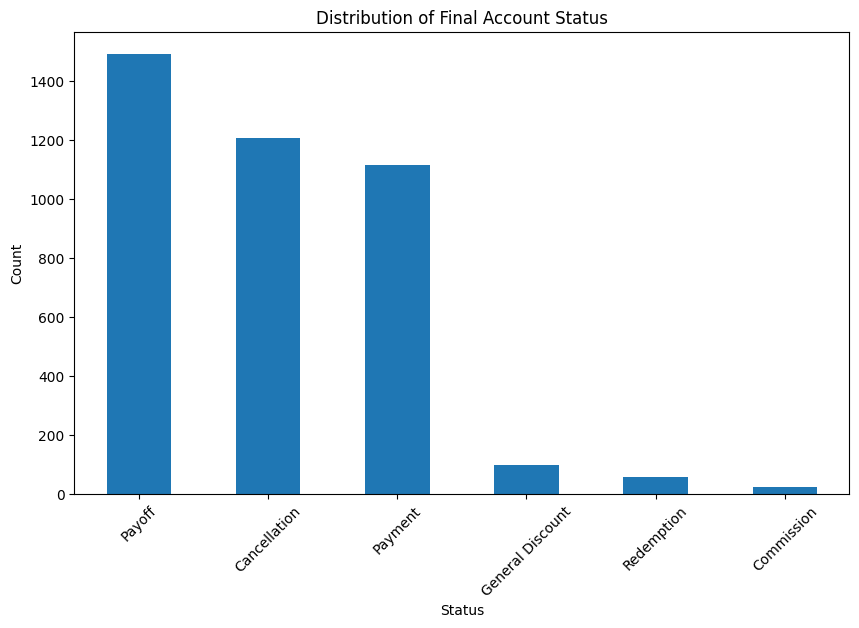

Loan completion rate: 37.33%
Loan cancellation rate: 30.23%
Other statuses: 32.43%


In [30]:
plt.figure(figsize=(10, 6))
account_df['final_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Final Account Status')
plt.ylabel('Count')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.show()

# Check loan completion rate
completion_rate = account_df['loan_completed'].mean() * 100
cancellation_rate = account_df['loan_cancelled'].mean() * 100
print(f"Loan completion rate: {completion_rate:.2f}%")
print(f"Loan cancellation rate: {cancellation_rate:.2f}%")
print(f"Other statuses: {100 - completion_rate - cancellation_rate:.2f}%")

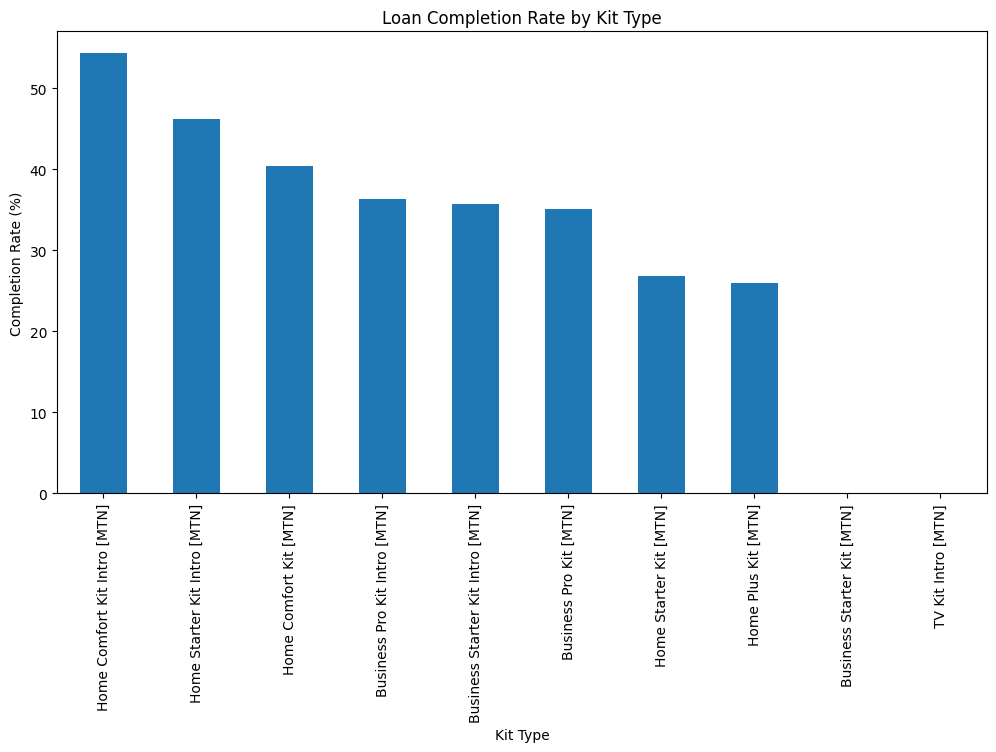

In [31]:
# Relationship between kit type and loan completion
plt.figure(figsize=(12, 6))
kit_completion = account_df.groupby('Account Kit Type')['loan_completed'].mean().sort_values(ascending=False) * 100
kit_completion.plot(kind='bar')
plt.title('Loan Completion Rate by Kit Type')
plt.ylabel('Completion Rate (%)')
plt.xlabel('Kit Type')
plt.xticks(rotation=90)
plt.show()

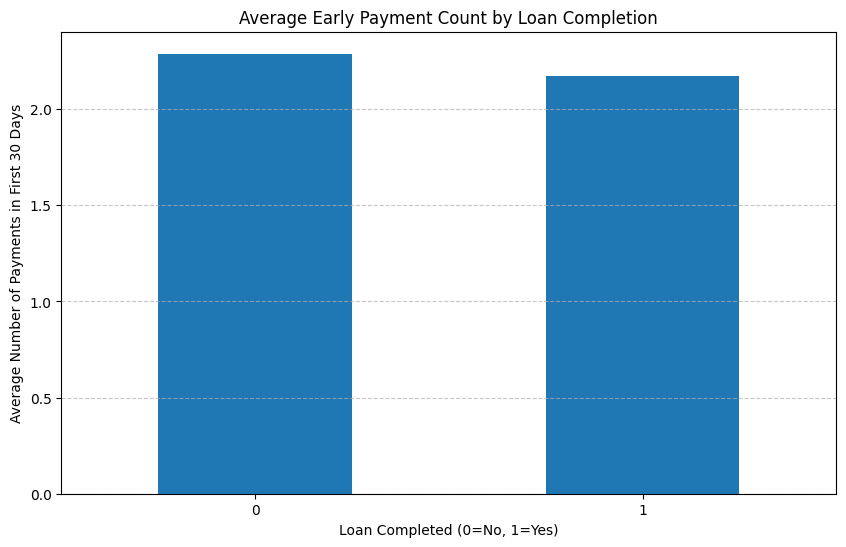

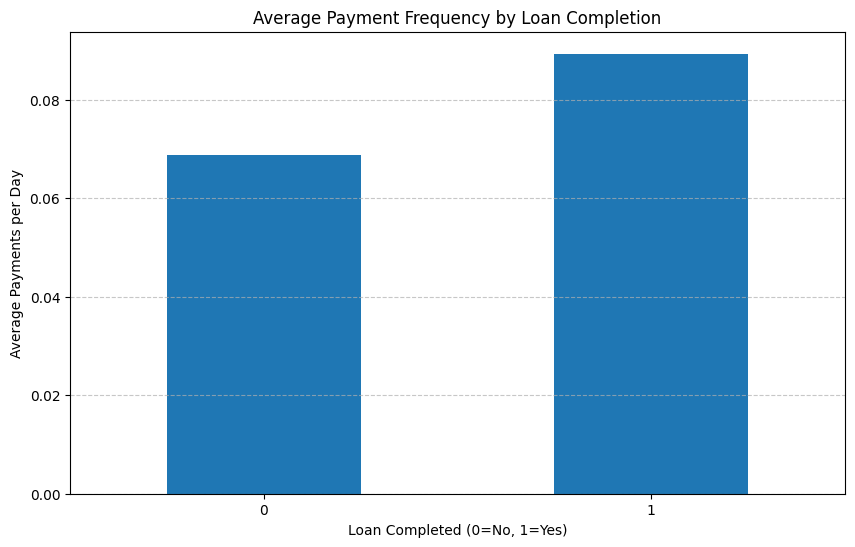

In [32]:
# Relationship between early payment behavior and loan completion using matplotlib
plt.figure(figsize=(10, 6))
# Group by loan_completed and calculate mean early payment count
early_payment_by_completion = account_df.groupby('loan_completed')['early_payment_count'].mean()
early_payment_by_completion.plot(kind='bar')
plt.title('Average Early Payment Count by Loan Completion')
plt.ylabel('Average Number of Payments in First 30 Days')
plt.xlabel('Loan Completed (0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Let's also look at payment frequency by loan completion
plt.figure(figsize=(10, 6))
payment_freq_by_completion = account_df.groupby('loan_completed')['payment_frequency'].mean()
payment_freq_by_completion.plot(kind='bar')
plt.title('Average Payment Frequency by Loan Completion')
plt.ylabel('Average Payments per Day')
plt.xlabel('Loan Completed (0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
# Select features and target
# Remove non-predictive columns like dates, IDs, and the target-related columns we don't want to use
drop_cols = ['Account ID', 'Account Kit Type', 'first_transaction_date', 'last_transaction_date', 
             'final_status', 'loan_cancelled', 'Payoff', 'Cancellation', 'account_lifetime_days']  

X = account_df.drop(drop_cols + ['loan_completed'], axis=1)
y = account_df['loan_completed']

In [51]:
def check_input(X):
    if np.any(np.isinf(X)):
        print("⚠️ Contains infinity!")
    if np.any(np.isnan(X)):
        print("⚠️ Contains NaN!")
    if np.max(np.abs(X)) > 1e10:
        print("⚠️ Values too large:", np.max(np.abs(X)))

In [52]:
# Check which columns contain infinity values
inf_columns = []
for col in X.columns:
    if np.isinf(X[col]).any():
        inf_columns.append(col)
        print(f"Column '{col}' contains {np.isinf(X[col]).sum()} infinity values")

# Replace infinity values with large finite values or NaN (which we'll then replace)
for col in inf_columns:
    # Replace inf with NaN temporarily
    X[col] = X[col].replace([np.inf, -np.inf], np.nan)
    
    # Replace NaN with the column median or a large value
    median_val = X[col].median()
    X[col] = X[col].fillna(median_val)
    
    print(f"Fixed column '{col}' - replaced infinities with median: {median_val}")

# Verify the fix
check_input(X)

Column 'repayment_pace' contains 5 infinity values
Fixed column 'repayment_pace' - replaced infinities with median: 0.14306162462164673


In [53]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3199, 44)
Testing set shape: (800, 44)


## Modal Training

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


Training Random Forest...
Random Forest - Accuracy: 0.9637, ROC AUC: 0.9940

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       508
           1       0.92      0.98      0.95       292

    accuracy                           0.96       800
   macro avg       0.96      0.97      0.96       800
weighted avg       0.97      0.96      0.96       800



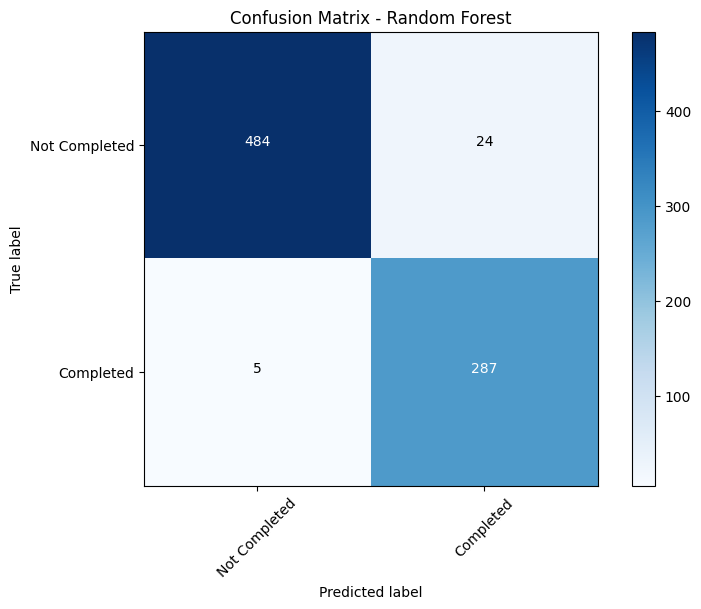


Training Logistic Regression...
Logistic Regression - Accuracy: 0.9413, ROC AUC: 0.9798

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       508
           1       0.88      0.98      0.92       292

    accuracy                           0.94       800
   macro avg       0.93      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



/Users/rtv-lpt-127/morris/interviews_2025/Engie-datascience-Assessment/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


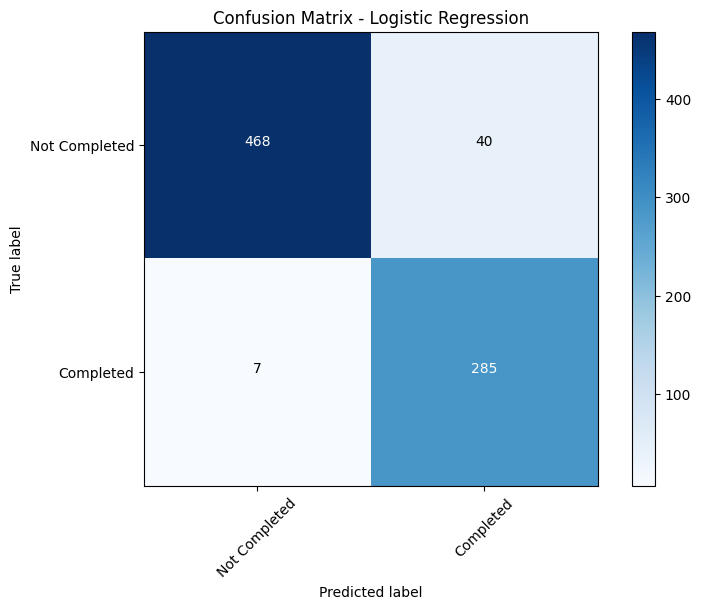

In [55]:
# Define our models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'model': model
    }
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Not Completed', 'Completed'], rotation=45)
    plt.yticks(tick_marks, ['Not Completed', 'Completed'])
    
    # Add text annotations
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

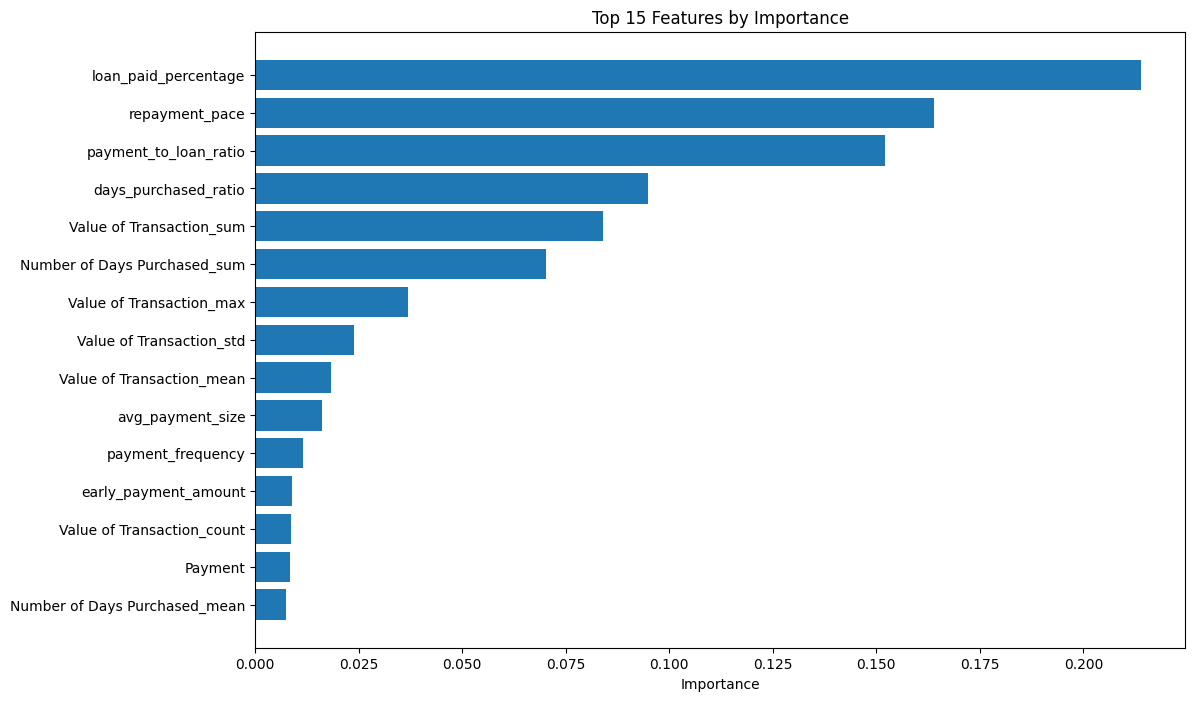


Top 15 Features by Importance:
                          Feature  Importance
13           loan_paid_percentage    0.213884
31                 repayment_pace    0.164034
27          payment_to_loan_ratio    0.152009
28           days_purchased_ratio    0.094785
7        Value of Transaction_sum    0.083914
11   Number of Days Purchased_sum    0.070160
9        Value of Transaction_max    0.036992
6        Value of Transaction_std    0.023851
5       Value of Transaction_mean    0.018302
26               avg_payment_size    0.016107
25              payment_frequency    0.011525
23           early_payment_amount    0.008905
4      Value of Transaction_count    0.008622
19                        Payment    0.008529
10  Number of Days Purchased_mean    0.007498


In [56]:
# Assuming Random Forest gives good results, let's examine feature importance
if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.title('Top 15 Features by Importance')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()  # Display the highest importance at the top
    plt.show()
    
    print("\nTop 15 Features by Importance:")
    print(top_features)

## Second Model : Predicting Time-to-Payoff

In [57]:
# Filter data to only include accounts that completed their loans
completed_loans_df = account_df[account_df['loan_completed'] == 1].copy()

In [65]:
# Create target variable: time to payoff (in days)
completed_loans_df['time_to_payoff'] = (completed_loans_df['last_transaction_date'] - 
                                        completed_loans_df['first_transaction_date']).dt.days

# Select features (similar to our classification task, but excluding target-related columns)
X_regression = completed_loans_df.drop(['Account ID', 'Account Kit Type', 'first_transaction_date', 
                                       'last_transaction_date', 'final_status', 'loan_completed', 
                                       'loan_cancelled', 'time_to_payoff', 'Payoff', 'Cancellation', 'account_lifetime_days'], axis=1)
y_regression = completed_loans_df['time_to_payoff']

In [66]:
# Comprehensive handling of infinity values
def fix_infinite_values(df):
    """Replace all infinity values in the dataframe with appropriate values"""
    # First identify columns with infinity
    inf_columns = []
    for col in df.columns:
        if df[col].dtype in [np.float64, np.float32, np.int64, np.int32]:  # Numeric columns only
            if np.isinf(df[col]).any():
                inf_columns.append(col)
                print(f"Column '{col}' contains {np.isinf(df[col]).sum()} infinity values")
    
    # Handle each column with infinity
    for col in inf_columns:
        # First look at the distribution to make an informed decision
        non_inf_values = df[col][~np.isinf(df[col])]
        
        if len(non_inf_values) > 0:
            # If we have non-infinity values, use their median
            median_val = non_inf_values.median()
            max_val = non_inf_values.max()
            
            # For positive infinities, use a value slightly larger than the max
            # For negative infinities, use a value slightly smaller than the min
            df[col] = df[col].replace(np.inf, max_val * 1.5)
            df[col] = df[col].replace(-np.inf, non_inf_values.min() * 1.5 if non_inf_values.min() < 0 else -1)
            
            print(f"Fixed column '{col}' - replaced infinities with values based on existing distribution")
        else:
            # If all values are infinity, replace with a reasonable default
            df[col] = df[col].replace([np.inf, -np.inf], 0)
            print(f"Fixed column '{col}' - replaced infinities with 0 (all values were infinite)")
    
    return df

In [67]:
X_regression = fix_infinite_values(X_regression)

Column 'repayment_pace' contains 5 infinity values
Fixed column 'repayment_pace' - replaced infinities with values based on existing distribution


In [68]:
check_input(X_regression)

In [69]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

In [70]:
# Train regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = rf_reg.predict(X_test_reg)

# Evaluate
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

In [71]:
print(f"Mean Absolute Error: {mae:.2f} days")
print(f"Root Mean Squared Error: {rmse:.2f} days")
print(f"R² Score: {r2:.4f}")

# Feature importance
reg_feature_importance = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

print("\nTop 15 Features for Predicting Time-to-Payoff:")
print(reg_feature_importance)

Mean Absolute Error: 4.28 days
Root Mean Squared Error: 15.43 days
R² Score: 0.9856

Top 15 Features for Predicting Time-to-Payoff:
                          Feature  Importance
31                 repayment_pace    0.939628
13           loan_paid_percentage    0.029701
27          payment_to_loan_ratio    0.006469
7        Value of Transaction_sum    0.002450
5       Value of Transaction_mean    0.002382
26               avg_payment_size    0.002370
25              payment_frequency    0.002335
9        Value of Transaction_max    0.002251
11   Number of Days Purchased_sum    0.001570
6        Value of Transaction_std    0.001520
29              payment_amount_cv    0.001252
10  Number of Days Purchased_mean    0.001101
19                        Payment    0.001094
12      avg_days_between_payments    0.000962
30          days_to_first_payment    0.000811
